# Classification :


In [22]:
import  pandas  as  pd
import  numpy as  np                   
import seaborn as sns                  
import matplotlib.pyplot as plt    
from sklearn.feature_extraction import DictVectorizer

In [39]:
data = pd.read_csv('bank-full.csv',sep=';')

In [40]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [41]:
data.shape

(45211, 17)

In [43]:
y = data['y']

In [44]:
y = y.replace(['yes','no'],(1,0))

In [45]:
import seaborn as sns

/home/aditya/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


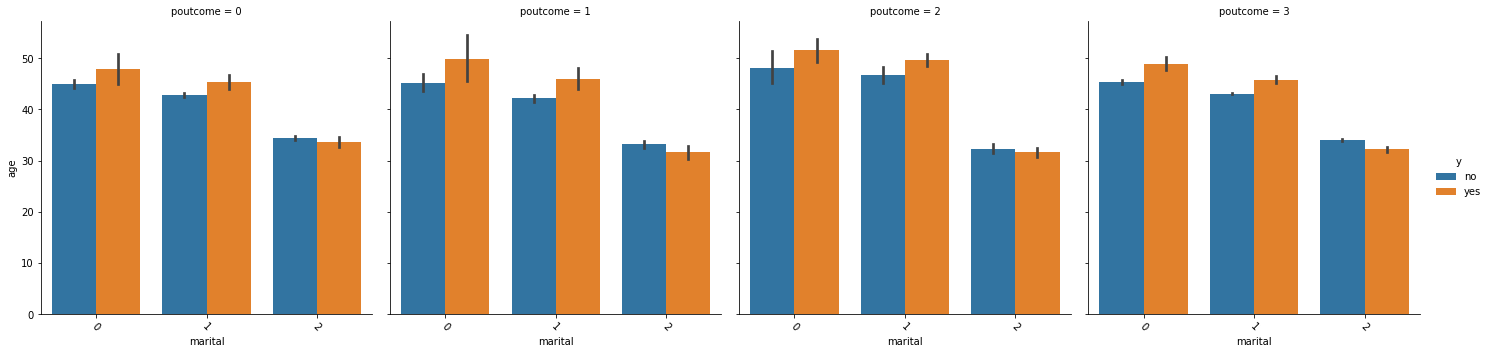

In [112]:
# Factor Plot
g = sns.factorplot(x='marital', y='age',data=data,hue='y',col='poutcome',kind = 'bar')  
g.set_xticklabels(rotation=-45)

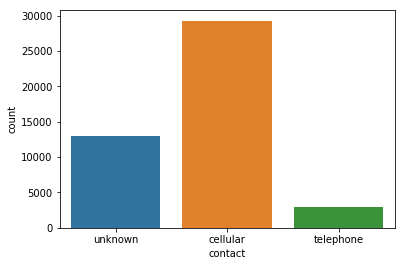

In [47]:
sns.countplot(x='contact', data=data)

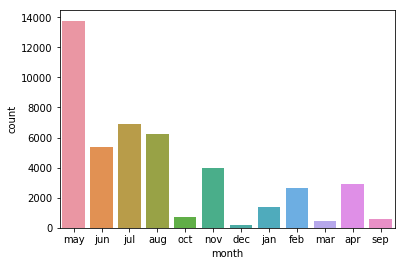

In [48]:
sns.countplot(x='month', data=data)

/home/aditya/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


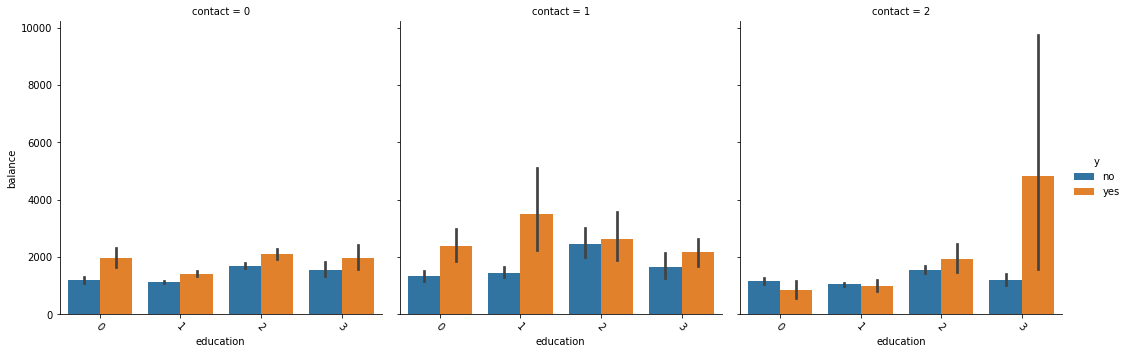

In [113]:
g = sns.factorplot(x='education', 
                   y='balance', 
                   data=data, 
                   hue='y',  
                   col='contact',
                 kind = 'bar')  
                   
 

g.set_xticklabels(rotation=-45)

In [52]:
from sklearn import preprocessing
def encode_features(df_train):
    features = ['job','marital','default','education','housing','loan','contact','month','poutcome']
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_train[feature])
        df_train[feature] = le.transform(df_train[feature])
    return df_train

In [53]:
data = encode_features(data)

In [54]:
X = data.drop(['y'], axis = 1)

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Using Logistic Regression with L2 regularization

In [56]:
from sklearn import linear_model 
from sklearn.linear_model import LogisticRegression
logreg = linear_model.LogisticRegression(penalty = 'l2' ,C=0.6)

In [57]:
logreg.fit(X_train,y_train)

LogisticRegression(C=0.6, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [58]:
y_pred = logreg.predict(X_test)

In [59]:
from sklearn.metrics import confusion_matrix
from  sklearn.metrics import accuracy_score

In [60]:
cnf = confusion_matrix(y_pred,y_test)

In [61]:
cnf

array([[11742,  1283],
       [  224,   315]])

In [62]:
accuracy_score(y_pred,y_test)

0.888897080507225

# Using RandomForest Classifier 

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
ranfor = RandomForestClassifier(n_estimators = 201, max_depth=10, random_state=42,criterion='gini')

In [65]:
ranfor.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=201, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [66]:
y_pred = ranfor.predict(X_test)

In [67]:
accuracy_score(y_pred,y_test)

0.9009141846063108

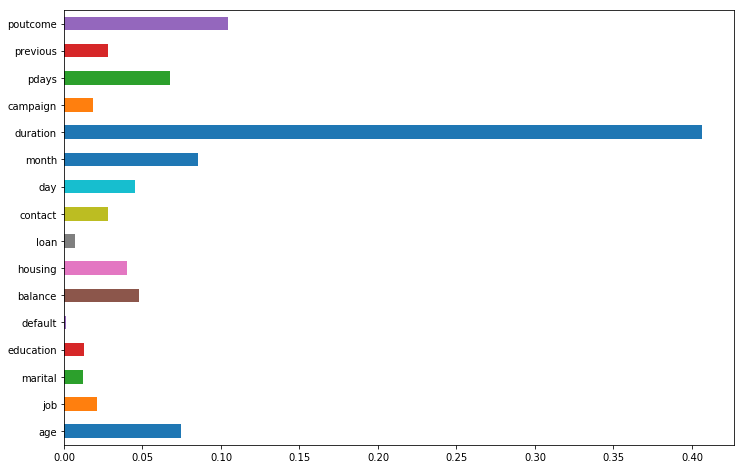

In [68]:
importances=pd.Series(ranfor.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

# Using KNearestNeighbors Classifier

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
model = KNeighborsClassifier(n_neighbors=10)

In [71]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [72]:
y_pred = model.predict(X_test)

In [73]:
accuracy_score(y_pred,y_test)

0.8827779416101444

# Analysis of marketing cost and sales

In [74]:
from sklearn.feature_extraction import DictVectorizer
from pandas.plotting import scatter_matrix

In [75]:
dat = pd.read_csv("bank-additional-full.csv")

In [76]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,no
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,no
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,no
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,no
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,no


In [77]:
dat = pd.read_csv("bank-additional-full.csv", sep=';')

In [79]:
dat.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [83]:
data_dict = dat.T.to_dict().values()

In [84]:
vec = DictVectorizer()
signal_array = vec.fit_transform(data_dict).toarray()
feature_names = vec.get_feature_names()

In [85]:
df = pd.DataFrame(signal_array,columns=feature_names)
df.head()

,age,campaign,cons.conf.idx,cons.price.idx,contact=cellular,contact=telephone,day_of_week=fri,day_of_week=mon,day_of_week=thu,day_of_week=tue,...,month=oct,month=sep,nr.employed,pdays,poutcome=failure,poutcome=nonexistent,poutcome=success,previous,y=no,y=yes
0,56.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,1.0,0.0
1,57.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,1.0,0.0
3,40.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,1.0,0.0
4,56.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,1.0,0.0


Feature ranking:
1. feature age (0.162857)
2. feature emp.var.rate (0.118767)
3. feature campaign (0.083599)
4. feature month=sep (0.046572)
5. feature nr.employed (0.032453)
6. feature cons.conf.idx (0.026373)
7. feature education=unknown (0.024496)
8. feature cons.price.idx (0.024462)
9. feature poutcome=nonexistent (0.021212)
10. feature housing=unknown (0.020932)
11. feature euribor3m (0.020748)
12. feature housing=yes (0.017712)
13. feature marital=divorced (0.016561)
14. feature education=professional.course (0.016307)
15. feature education=basic.9y (0.016283)
16. feature poutcome=success (0.015198)
17. feature marital=married (0.014881)
18. feature day_of_week=mon (0.014553)
19. feature job=student (0.014320)
20. feature day_of_week=tue (0.014208)
21. feature day_of_week=wed (0.014173)
22. feature day_of_week=thu (0.013997)
23. feature job=unknown (0.013983)
24. feature loan=unknown (0.013868)
25. feature day_of_week=fri (0.013469)
26. feature education=illiterate (0.011845)
27.

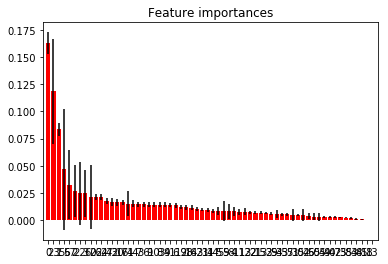

In [111]:
# Using the best classification model i.e., Random Forest, to find the important_features ranking

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

X = signal_array[:,:-2]
X = np.hstack((X[:,:14],X[:,15:]))
y = signal_array[:,-1]
forest = RandomForestClassifier(n_estimators=201,
                              random_state=42)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

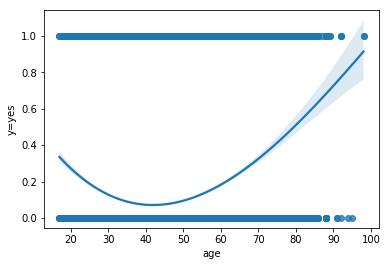

In [89]:
ax = sns.regplot(x="age", y="y=yes", order=3, data=df, truncate=True)


In [90]:
print "Nth Call \t Efficiency"
for i in range(1,15):
    goo = sum(df.loc[df['campaign']==i]['y=yes']) / float(df.loc[df['campaign'] >= i].shape[0])
    print (str((i))+" \t\t "+str(goo))

Nth Call 	 Efficiency
1 		 0.0558415072351
2 		 0.0514312409751
3 		 0.0442355117139
4 		 0.0326129666012
5 		 0.024077046549
6 		 0.0221565731167
7 		 0.0157938487116
8 		 0.00956668542487
9 		 0.0123456790123
10 		 0.0109689213894
11 		 0.0138089758343
12 		 0.00433526011561
13 		 0.00705467372134
14 		 0.00210526315789


In [92]:
print("For age upto 60")
print "Nth Call \t Efficiency"
for i in range(1,15):
    num = float(df[(df['age'] <= 60) & (df['campaign']==i) & (df['y=yes']==1)].shape[0])
    den = 1+float(df[(df['age'] <= 60) & (df['campaign'] >= i)].shape[0])
    print (str((i))+" \t\t "+str(num/den))

For age upto 60
Nth Call 	 Efficiency
1 		 0.0514908513121
2 		 0.0475469412477
3 		 0.0417742314011
4 		 0.0303995752024
5 		 0.0230909459186
6 		 0.0211687537269
7 		 0.0142497904443
8 		 0.00907029478458
9 		 0.0124087591241
10 		 0.0110091743119
11 		 0.0127167630058
12 		 0.00434782608696
13 		 0.00706713780919
14 		 0.00210970464135


In [93]:
print("For age above 60")
print "Nth Call \t Efficiency"
for i in range(1,15):
    num = float(df[(df['age'] > 60) & (df['campaign']==i) & (df['y=yes']==1)].shape[0])
    den = float(df[(df['age'] > 60) & (df['campaign'] >= i)].shape[0])+1
    print (str((i))+" \t\t "+str(num/den))

For age above 60
Nth Call 	 Efficiency
1 		 0.248079034029
2 		 0.258064516129
3 		 0.205128205128
4 		 0.192307692308
5 		 0.122448979592
6 		 0.121212121212
7 		 0.181818181818
8 		 0.0666666666667
9 		 0.0
10 		 0.0
11 		 0.166666666667
12 		 0.0
13 		 0.0
14 		 0.0


In [94]:
total_calls = sum(df['campaign'])
print(total_calls)

105754.0


In [105]:
#Considering threshold = 4 calls for efficiency> 3%
extra_calls = sum(df[df['campaign']>4]['campaign']) - 4*df[df['campaign']>4].shape[0]
print(extra_calls)

20409.0


In [106]:
reduction=100*extra_calls/total_calls
print(reduction)

19.2985608109


In [107]:
total_sales=float(df[df['y=yes']==1].shape[0])
print(total_sales)

4640.0


In [108]:
less_costly_sales=float(df[(df['campaign'] <= 4) & (df['y=yes']==1)].shape[0])
print(less_costly_sales)

4334.0


In [109]:
sales_percent=100*less_costly_sales/total_sales
print(sales_percent)

93.4051724138


In [110]:
#Based on the analysis and the best model for classification(Random Forest Classifier), the resultant reduction in 
# Marketing cost = 19.29% and Increment in sales = 93.40 %